In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as nu
import seaborn as sea
import matplotlib as mp
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
url = "https://raw.githubusercontent.com/BTanjerine/LoanDataCSV/main/Loan_payments_data2.txt"
data = pd.read_csv(url)
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20160326,PAIDOFF,1000,30,1/9/2017,2/7/2017,2/6/2017 10:00,NaN,27,college,male
1,xqd20160327,PAIDOFF,900,30,1/10/2017,2/8/2017,2/7/2017 11:00,NaN,29,college,female
2,xqd20160328,PAIDOFF,800,15,1/11/2017,1/25/2017,1/25/2017 12:00,NaN,30,high school,male
3,xqd20160329,PAIDOFF,700,15,1/12/2017,1/26/2017,1/26/2017 13:00,NaN,25,high school,female
4,xqd20160330,PAIDOFF,600,15,1/13/2017,1/27/2017,1/27/2017 14:00,NaN,24,college,male


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         1015 non-null   object 
 1   loan_status     1015 non-null   object 
 2   Principal       1015 non-null   int64  
 3   terms           1015 non-null   int64  
 4   effective_date  1015 non-null   object 
 5   due_date        1015 non-null   object 
 6   paid_off_time   704 non-null    object 
 7   past_due_days   613 non-null    float64
 8   age             1015 non-null   int64  
 9   education       1015 non-null   object 
 10  Gender          1015 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 87.4+ KB


In [ ]:
print(data.isnull().sum())
data.shape

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     311
past_due_days     402
age                 0
education           0
Gender              0
dtype: int64


(1015, 11)

## Data
- Loan_status: loan is paid off, in collection, new customer yet to payoff, or paid off after the collection efforts
- Principal: principal loan amount at the origination
- Terms: Weekly (7 days), biweekly, and monthly payoff schedule
- Effective_date: When loan got originated and took effects
- Due_date: loan due date
- Paidoff_time: The actual time a customer pays off the loan
- Pastdue_days: How many days a loan has been past due
- Age, education, gender A customer’s basic demographic information


In [ ]:
data.isna().any()

Loan_ID           False
loan_status       False
Principal         False
terms             False
effective_date    False
due_date          False
paid_off_time      True
past_due_days      True
age               False
education         False
Gender            False
dtype: bool

## Filling in Null Values
- Paid off time and past due days have null values
- past due days: replace nulls with 0 (no past due date)
- paid off time: can replace column with another column or eliminate that column

In [ ]:
# fill in null past due dates with 0
data['past_due_days'] = data['past_due_days'].fillna(0)
data.isna().any()

Loan_ID           False
loan_status       False
Principal         False
terms             False
effective_date    False
due_date          False
paid_off_time      True
past_due_days     False
age               False
education         False
Gender            False
dtype: bool

## Removing any unnecessary Columns
- paid off time can be removed because we know due data and time it took to pay it off
- effective date can be removed because it is unnecessary


In [ ]:
data = data.drop(columns=['paid_off_time', 'effective_date', 'Loan_ID', 'due_date'])
data.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,0.0,27,college,male
1,PAIDOFF,900,30,0.0,29,college,female
2,PAIDOFF,800,15,0.0,30,high school,male
3,PAIDOFF,700,15,0.0,25,high school,female
4,PAIDOFF,600,15,0.0,24,college,male


In [ ]:
print(data.isnull().sum())
data.shape

loan_status      0
Principal        0
terms            0
past_due_days    0
age              0
education        0
Gender           0
dtype: int64


(1015, 7)

## Find and clean noisy data

array([[<Axes: title={'center': 'Principal'}>,
        <Axes: title={'center': 'terms'}>],
       [<Axes: title={'center': 'past_due_days'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

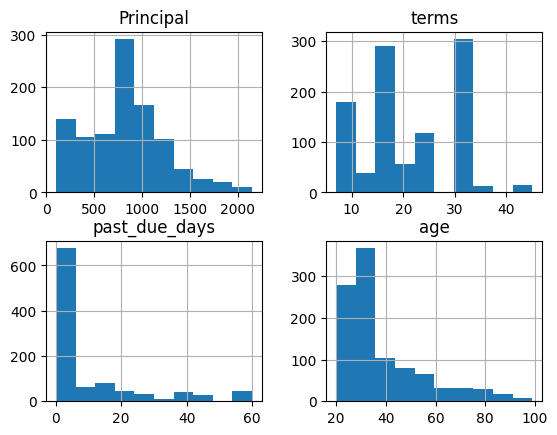

In [ ]:
data.hist()

In [ ]:
data.describe()

,Principal,terms,past_due_days,age
count,1015.000000,1015.000000,1015.000000,1015.000000
mean,833.349754,20.065025,9.847291,38.233498
std,404.210106,9.196931,15.637578,16.378164
min,100.000000,7.000000,0.000000,20.000000
25%,600.000000,15.000000,0.000000,27.000000
50%,800.000000,15.000000,3.000000,31.000000
75%,1080.000000,30.000000,14.000000,45.000000
max,2150.000000,45.000000,60.000000,99.000000


## Visualizing The Data

<Axes: >

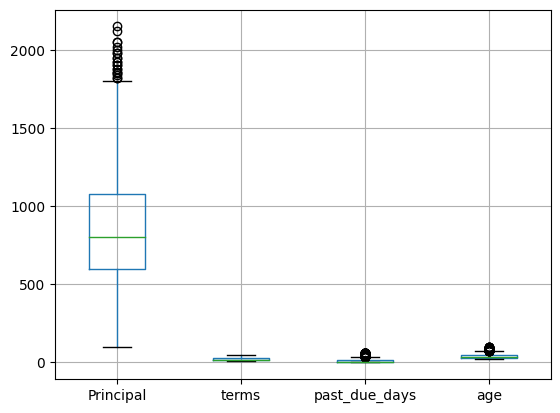

In [ ]:
data.boxplot()

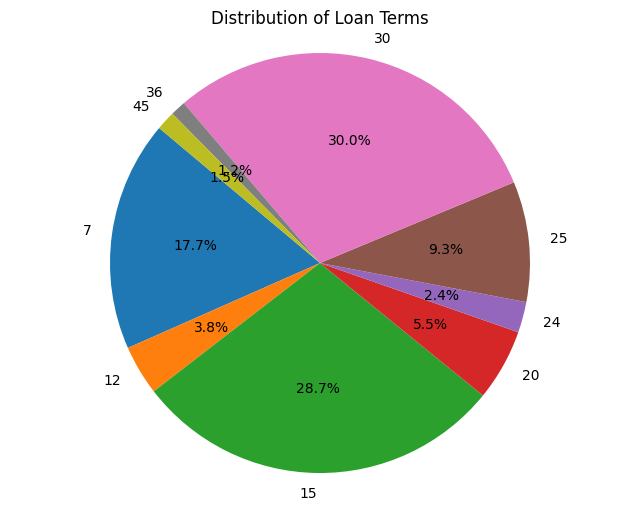

In [ ]:
encoded_loan_status = pd.get_dummies(data['terms'])
status_counts = encoded_loan_status.sum()
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan Terms')
plt.axis('equal')
plt.show()

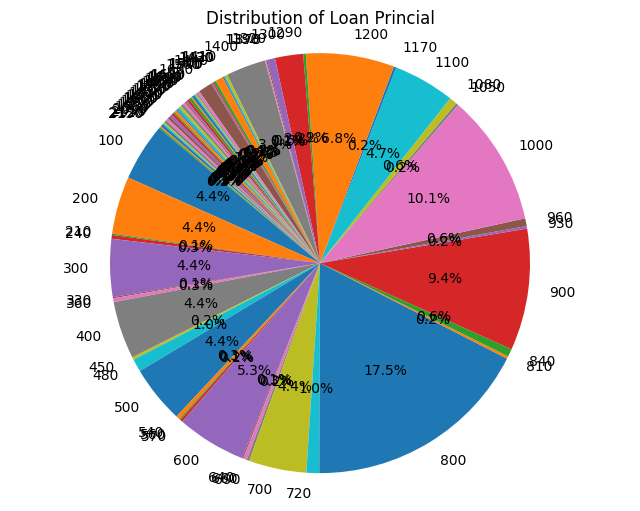

In [ ]:
encoded_loan_status = pd.get_dummies(data['Principal'])
status_counts = encoded_loan_status.sum()
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan Princial')
plt.axis('equal')
plt.show()

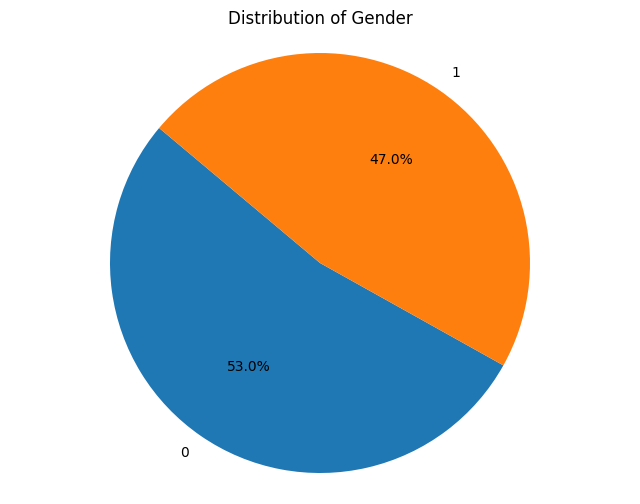

In [ ]:
gen_enc = {'male': 0, 'female': 1}
data['Gender'] = data['Gender'].map(gen_enc)

encoded_gender = pd.get_dummies(data['Gender'])
status_counts = encoded_gender.sum()
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.axis('equal')
plt.show()

In [ ]:
print(data.isnull().sum())
data.shape

loan_status      0
Principal        0
terms            0
past_due_days    0
age              0
education        0
Gender           0
dtype: int64


(1015, 7)

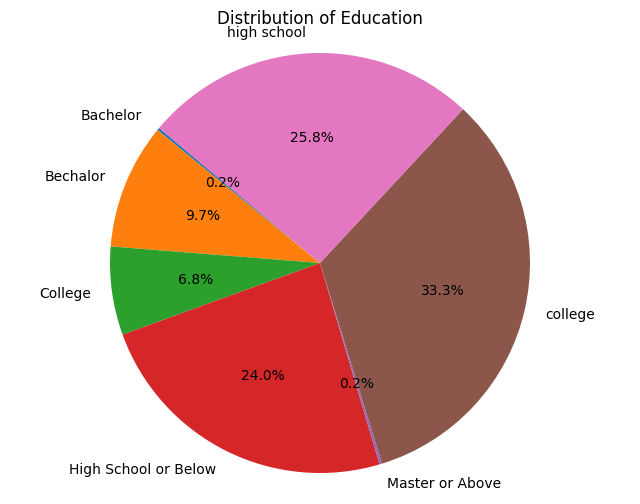

In [ ]:
encoded_edu = pd.get_dummies(data['education'])
status_counts = encoded_edu.sum()
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Education')
plt.axis('equal')
plt.show()

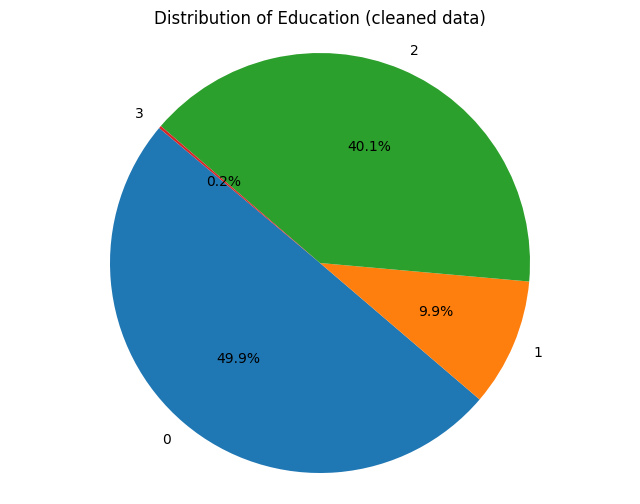

In [ ]:
edu_enc = {'high school': 0, 'High School or Below': 0, 'Bachelor': 1, 'Bechalor': 1, 'College': 2 ,'college': 2, 'Master or Above': 3}
data['education'] = data['education'].replace(edu_enc)

encoded_edu = pd.get_dummies(data['education'])
status_counts = encoded_edu.sum()
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Education (cleaned data)')
plt.axis('equal')
plt.show()

In [ ]:
print(data.isnull().sum())
data.shape

loan_status      0
Principal        0
terms            0
past_due_days    0
age              0
education        0
Gender           0
dtype: int64


(1015, 7)

if it is COLLECTION_PAIDOFF:
- if the past due days is above 5, then that person must either be at least 15 years older than they were when they took the original loan out to get approved for a new one or college-educated and 5 years have passed(it's obviously more complicated than that in real life)
- if the past due days is below 5, a non-college person would wait 5 years to get approved, college person would get approved (for simplicity, the assumption is he/she used the money for school)

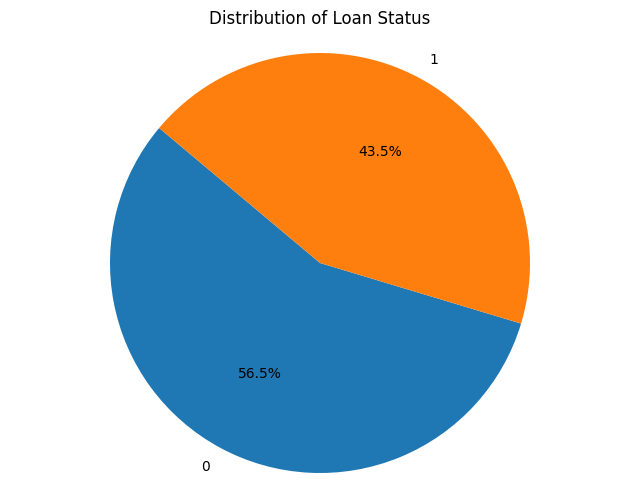

In [ ]:
ln_stat_enc = {'PAIDOFF': 1, 'COLLECTION': 0, 'COLLECTION_PAIDOFF': 0, 'NOT_PAIDOFF': 0}

def loan_status_check(row):
  if row['loan_status'] == 'PAIDOFF':
    return 1
  elif row['loan_status'] == 'COLLECTION' or row['loan_status'] == 'NOT_PAIDOFF':
      return 0;
  elif row['loan_status'] == 'COLLECTION_PAIDOFF':
      if row['past_due_days'] < 5 and row['education'] > 0:
        return 1
      else:
        return 0


data['loan_status'] = data.apply(loan_status_check, axis=1)

encoded_ln_stat = pd.get_dummies(data['loan_status'])
status_counts = encoded_ln_stat.sum()
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan Status')
plt.axis('equal')
plt.show()

In [ ]:
print(data.isnull().sum())
data.shape

loan_status      0
Principal        0
terms            0
past_due_days    0
age              0
education        0
Gender           0
dtype: int64


(1015, 7)

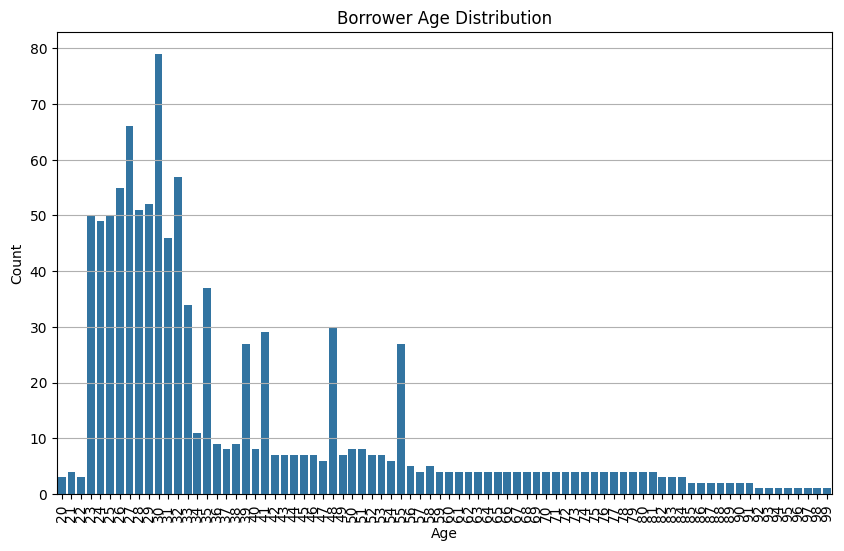

In [ ]:
plt.figure(figsize=(10, 6))
sea.countplot(x='age', data=data)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Borrower Age Distribution')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

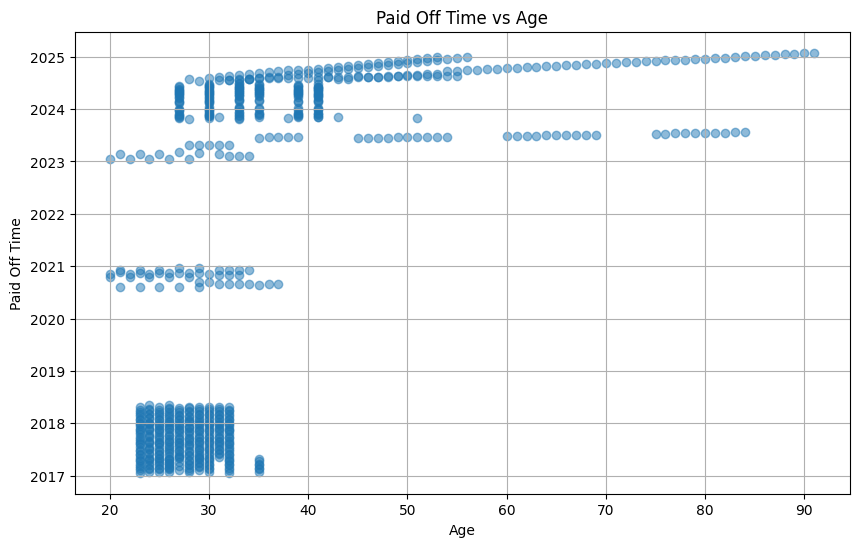

In [ ]:
url2 = "https://raw.githubusercontent.com/BTanjerine/LoanDataCSV/main/Loan_payments_data2.txt"
dat = pd.read_csv(url2)
dat['paid_off_time'] = pd.to_datetime(dat['paid_off_time'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.scatter(dat['age'], dat['paid_off_time'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Paid Off Time')
plt.title('Paid Off Time vs Age')
plt.grid(True)
plt.show()

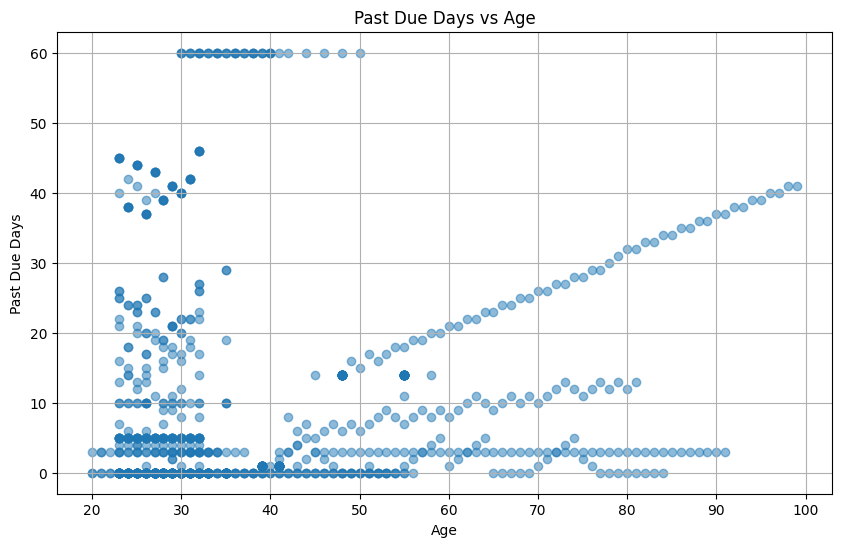

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['past_due_days'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Past Due Days')
plt.title('Past Due Days vs Age')
plt.grid(True)
plt.show()

## Feature Importance
*   Predicts and targets age and displays the most relevant features



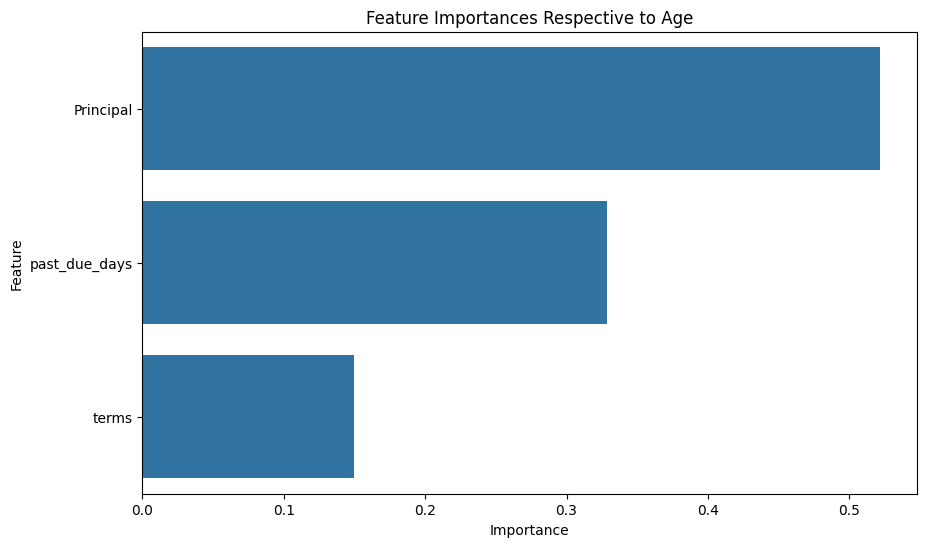

In [ ]:
#numeric_columns = data.select_dtypes(include=['int', 'float']).columns
data_numeric = data[['age','past_due_days', 'Principal', 'terms']]
X = data_numeric.drop(columns=['age'])
y = data_numeric['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sea.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances Respective to Age')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
k = 5
top_features = feature_importance_df.head(k)['Feature'].tolist()
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

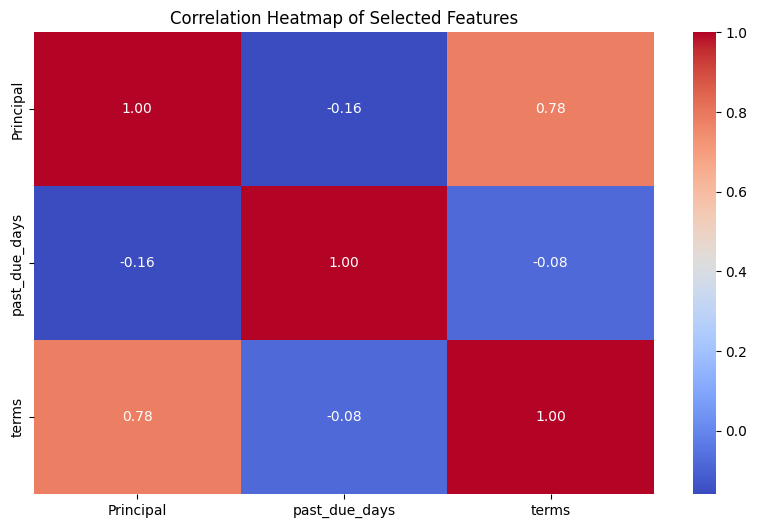

In [ ]:
# Compute the correlation matrix
correlation_matrix = X_train_selected.corr()

# Generate a heatmap
plt.figure(figsize=(10, 6))
sea.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.show()

## Data Normalization
*   scales feature mean to 0
*   scales feature standad deviation to 1



In [ ]:
data_numeric = data[['age', 'past_due_days', 'Principal', 'terms']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)
scaled_data_df = pd.DataFrame(scaled_data, columns=data_numeric.columns)
data[['age', 'past_due_days', 'Principal', 'terms']] = scaled_data_df

## Correlation Matrix and Standard Deviations
*   allows us to compare Standard Deviation and the Correlation Matrix to understand how scaling affects our data.



In [ ]:
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
data_numeric = data[numeric_columns]
correlation_matrix = data_numeric.corr()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)
standard_deviations = nu.std(scaled_data, axis=0)
print(correlation_matrix)
print(standard_deviations)

               loan_status  Principal     terms  past_due_days       age  \
loan_status       1.000000   0.055869 -0.049662      -0.539232 -0.292681   
Principal         0.055869   1.000000  0.776745      -0.133171  0.343414   
terms            -0.049662   0.776745  1.000000      -0.046300  0.365821   
past_due_days    -0.539232  -0.133171 -0.046300       1.000000  0.103647   
age              -0.292681   0.343414  0.365821       0.103647  1.000000   
education         0.287946   0.004060  0.042531      -0.036539 -0.320667   
Gender            0.096674  -0.031162 -0.072802      -0.073651 -0.092294   

               education    Gender  
loan_status     0.287946  0.096674  
Principal       0.004060 -0.031162  
terms           0.042531 -0.072802  
past_due_days  -0.036539 -0.073651  
age            -0.320667 -0.092294  
education       1.000000  0.282465  
Gender          0.282465  1.000000  
[1. 1. 1. 1. 1. 1. 1.]


## Encoding Text data
- mapped keywords to values ^^^

In [ ]:
data.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,1,0.412489,1.080782,-0.63003,-0.686221,2,0
1,1,0.164971,1.080782,-0.63003,-0.564047,2,1
2,1,-0.082547,-0.551001,-0.63003,-0.502960,0,0
3,1,-0.330065,-0.551001,-0.63003,-0.808395,0,1
4,1,-0.577583,-0.551001,-0.63003,-0.869482,2,0


## Generate new Data File

In [ ]:
data.to_csv('cleaned_loan_data.csv')

!head cleaned_loan_data.csv

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,1,0.41248944151848405,1.080781526286563,-0.6300301044803185,-0.6862207309507374,2,0
1,1,0.16497139059252405,1.080781526286563,-0.6300301044803185,-0.5640467190379154,2,1
2,1,-0.08254666033343595,-0.5510013711462929,-0.6300301044803185,-0.5029597130815043,0,0
3,1,-0.33006471125939596,-0.5510013711462929,-0.6300301044803185,-0.8083947428635595,0,1
4,1,-0.577582762185356,-0.5510013711462929,-0.6300301044803185,-0.8694817488199705,2,0
5,1,-0.825100813111316,-0.5510013711462929,-0.6300301044803185,-0.7473077369071485,2,1
6,1,-1.072618864037276,-1.4212855831104827,-0.6300301044803185,-0.9305687547763816,0,0
7,1,-1.320136914963236,-1.4212855831104827,-0.6300301044803185,-0.3807857011686823,2,1
8,1,-1.567654965889196,-1.4212855831104827,-0.6300301044803185,-0.6251337249943264,0,0


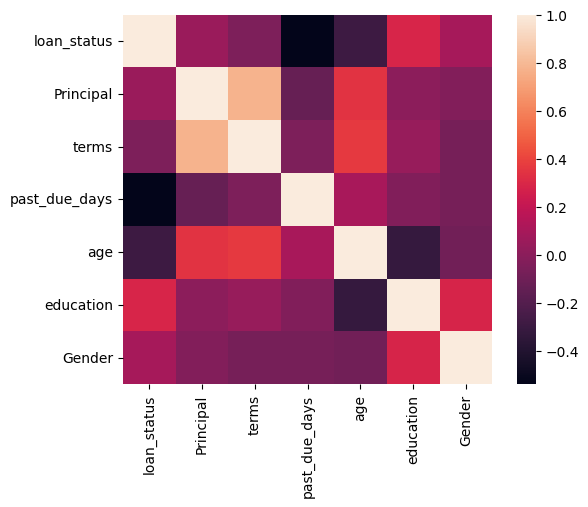

In [ ]:
map = data.corr()
sea.heatmap(map,square=True)
plt.show()